In [86]:
!jupyter nbconvert --to markdown 4_7_7_Exercises.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook 4_7_7_Exercises.ipynb to markdown
[NbConvertApp] Support files will be in 4_7_7_Exercises_files/
[NbConvertApp] Making directory 4_7_7_Exercises_files
[NbConvertApp] Writing 18738 bytes to 4_7_7_Exercises.md


# 4.7.7. Exercises

## 1. What could happen when we change the behavior of a search engine? What might the users do? What about the advertisers?

When the behavior of a search engine changes, several outcomes can occur, impacting both users and advertisers:

1. **Users' Reactions:**
   - Improved Search Experience: If the changes result in more accurate and relevant search results, users might have a better experience and find the information they're looking for more easily.
   - Frustration and Discontent: On the other hand, if the changes lead to less relevant results, users might become frustrated and dissatisfied with the search engine's performance.
   - Change in User Habits: Users might change their search behaviors, such as using different search engines or altering their search queries to adapt to the new behavior.

2. **Advertisers' Reactions:**
   - Changes in Ad Performance: Altering the behavior of the search engine could affect the performance of advertisements. Advertisers might see variations in click-through rates, conversion rates, and overall campaign success.
   - Adjustment of Advertising Strategies: Advertisers might need to modify their advertising strategies, keywords, and targeting parameters to align with the new search engine behavior.
   - Financial Impact: If the changes lead to decreased ad performance, advertisers might experience reduced return on investment (ROI) and might reconsider their advertising budgets on that platform.

3. **Algorithmic Impact:**
   - Changes in Ranking: Search engine behavior often revolves around algorithms that determine how content is ranked and displayed. Algorithmic changes could lead to shifting rankings, affecting the visibility of websites and content.
   - SEO Practices: Search engine optimization (SEO) strategies might need to be adjusted to match the new algorithms, potentially affecting how websites are optimized for better search engine visibility.

4. **Search Engine Market Share:**
   - Changes in User Base: Search engine behavior changes could influence user preferences, leading to shifts in market share among search engines. Users might migrate to other search engines if they prefer their new behaviors.

5. **Ethical and Legal Considerations:**
   - Privacy Concerns: Changes in behavior could impact user privacy and data usage, leading to ethical and legal concerns regarding user data collection and tracking.
   - Regulatory Compliance: Changes in behavior might need to comply with data protection and privacy regulations in different regions.

Overall, any changes to a search engine's behavior can have far-reaching effects on user satisfaction, user habits, advertiser performance, and even the competitive landscape. Careful consideration and testing are essential before implementing significant changes to ensure a positive impact on both users and advertisers.

## 2. Implement a covariate shift detector. Hint: build a classifier.

A covariate shift detector aims to identify if there is a distribution shift between the training data and the test data. One approach to detecting covariate shift is by building a classifier that tries to distinguish between the training and test data.
- In the `SameFashionMNIST`, we use both train and test dataset from `FashionMNIST`, and the `auc` of shift detector is **0.5**, which implies that there is **no covariate shift**.
- In the `CovarFashionMNIST`, we use trainset from `FashionMNIST` and testset from `MNIST`, and the `auc` of shift detector is **0.99**, which implies that testset is **totally different** from trainset.

In [91]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.nn import functional as F
from sklearn.metrics import roc_auc_score
import sys
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l


class SameFashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)
        num_rows_to_select = val.data.shape[0]//2
        # 从数组中随机选择行
        random_rows_indices = torch.randperm(train.data.size(0))
        self.train_X = torch.cat(
            (train.data[random_rows_indices[:num_rows_to_select]],
             val.data[:num_rows_to_select]), dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.train_y = torch.cat((torch.ones(num_rows_to_select),
                             torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.val_X = torch.cat((train.data[
            random_rows_indices[num_rows_to_select:2*num_rows_to_select]],
            val.data[num_rows_to_select:2*num_rows_to_select]),
                          dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.val_y = torch.cat((torch.ones(num_rows_to_select),
                           torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.train = torch.utils.data.TensorDataset(self.train_X, self.train_y)
        self.val = torch.utils.data.TensorDataset(self.val_X, self.val_y)
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        """Defined in :numref:`sec_fashion_mnist`"""
        X, y = batch
        # if not labels:
        #     labels = self.text_labels(y)
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

auc: 0.49589999999999995


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


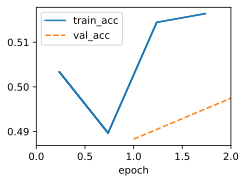

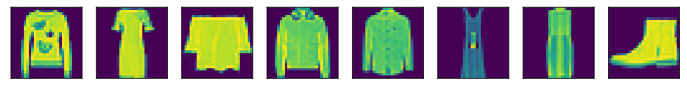

In [93]:
data = SameFashionMNIST(batch_size=256)
detector = d2l.SoftmaxRegression(num_outputs=2, lr=0.1)
trainer = d2l.Trainer(max_epochs=2)
trainer.fit(detector, data)
y_hat=detector.net(data.val_X)
preds = y_hat.argmax(axis=1)
print(f'auc: {roc_auc_score(data.val_y, preds)}')
index = data.val_y == 0
data.visualize([data.val_X[index],data.val_y])

auc: 0.995


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


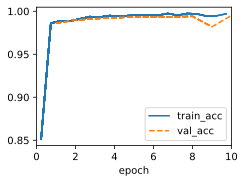

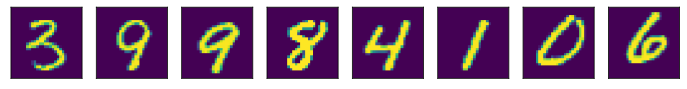

In [82]:
class CovarFashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        val = torchvision.datasets.MNIST(
            root=self.root, train=False, transform=trans, download=True)
        num_rows_to_select = val.data.shape[0]//2
        # 从数组中随机选择行
        random_rows_indices = torch.randperm(train.data.size(0))
        self.train_X = torch.cat(
            (train.data[random_rows_indices[:num_rows_to_select]],
             val.data[:num_rows_to_select]), dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.train_y = torch.cat((torch.ones(num_rows_to_select),
                             torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.val_X = torch.cat((train.data[
            random_rows_indices[num_rows_to_select:2*num_rows_to_select]],
            val.data[num_rows_to_select:2*num_rows_to_select]),
                          dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.val_y = torch.cat((torch.ones(num_rows_to_select),
                           torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.train = torch.utils.data.TensorDataset(self.train_X, self.train_y)
        self.val = torch.utils.data.TensorDataset(self.val_X, self.val_y)
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        """Defined in :numref:`sec_fashion_mnist`"""
        X, y = batch
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
        
data = CovarFashionMNIST(batch_size=256)
model = d2l.SoftmaxRegression(num_outputs=2, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat=model.net(data.val_X)
preds = y_hat.argmax(axis=1)
print(f'auc: {roc_auc_score(data.val_y, preds)}')
index = data.val_y == 0
data.visualize([data.val_X[index],data.val_y])

## 3. Implement a covariate shift corrector.

Covariate shift correction aims to mitigate the effects of distribution differences between training and test data. One common technique for covariate shift correction is importance weighting, where you assign different weights to training samples to make their distribution match the test distribution. 

In [61]:
from torch import nn


class CorrFashionMNIST(d2l.DataModule):
    def __init__(self, detector, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)
        self.train_X = train.data.type(torch.float32)#.unsqueeze(dim=1)
        self.train_y = train.targets.type(torch.int64)
        self.train_weight = self.stat_weight(self.train_X)
        self.val_X = val.data.type(torch.float32)#.unsqueeze(dim=1)
        self.val_y = val.targets.type(torch.int64)
        self.val_weight = self.stat_weight(self.val_X)
        # print(self.train_weight.shape, self.train_X.shape, self.train_y.shape)
        self.train = torch.utils.data.TensorDataset(self.train_weight, self.train_X, self.train_y)
        self.val = torch.utils.data.TensorDataset(self.val_weight, self.val_X, self.val_y)
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        """Defined in :numref:`sec_fashion_mnist`"""
        X, y = batch
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

    def stat_weight(self, X):
        h = self.detector(X)
        weight = torch.exp(h[:,1]-h[:,0])
        weight[weight==torch.inf] = 10
        # weight.requires_grad = True
        weight = weight.detach()
        return weight


class CorrSoftmaxRegression(d2l.Classifier):
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                  nn.LazyLinear(num_outputs))
        
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y, weight=None):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        l = F.cross_entropy(y_hat, y, reduction='none')
        # weight = torch.ones(l.shape[0])
        if weight is not None:
            # print(weight.shape, weight.sum())
            l = l*weight
        # weight = weight.reshape(-1,1) + torch.zeros(1, self.num_outputs)
        # print(weight.shape)
        return l.mean()
                               

    def training_step(self, batch, plot_flag=True):
        # print("training")
        y_hat = self(*batch[1:-1])
        l = self.loss(y_hat, batch[-1], batch[0])
        # l = self.loss(y_hat, batch[-1])
        # auc = torch.tensor(roc_auc_score(batch[-1].detach().numpy() , y_hat[:,1].detach().numpy()))
        if plot_flag:
            # self.plot('loss', l, train=True)
            # self.plot('auc', auc, train=True)
            self.plot('acc', self.accuracy(y_hat, batch[-1]), train=True)
        return l

    def validation_step(self, batch, plot_flag=True):
        y_hat = self(*batch[1:-1])
        l = self.loss(y_hat, batch[-1])
        # auc = torch.tensor(roc_auc_score(batch[-1].detach().numpy() , y_hat[:,1].detach().numpy()))
        if plot_flag:
            # self.plot('loss', l, train=False)
            # self.plot('auc', auc, train=True)
            self.plot('acc', self.accuracy(y_hat, batch[-1]), train=False)
        return l

acc:0.80


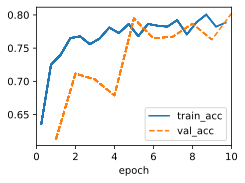

In [62]:
data = CorrFashionMNIST(detector=detector, batch_size=256)
model = CorrSoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat=model.net(data.val_X)
print(f'acc:{model.accuracy(y_hat, data.val_y):.2f}')

acc:0.79


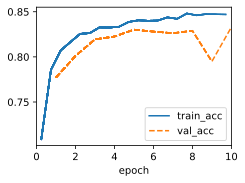

In [20]:
data = d2l.FashionMNIST(batch_size=256)
model = d2l.SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat=model.net(data.val.data.type(torch.float32))
print(f'acc:{model.accuracy(y_hat, data.val.targets):.2f}')

## 4. Besides distribution shift, what else could affect how the empirical risk approximates the risk?

Several factors can affect how well the empirical risk approximates the true risk in machine learning models beyond distribution shift:

1. **Sample Size:** The size of the training dataset plays a crucial role in how well the empirical risk approximates the risk. Smaller sample sizes may lead to higher variance and less accurate risk estimation.

2. **Sample Quality:** The quality of the training data matters. If the training dataset contains noise, outliers, or mislabeled examples, the empirical risk may be skewed.

3. **Bias and Fairness:** If the training dataset is biased in terms of representation or contains biased labels, it can lead to biased models and inaccurate risk estimates, especially when deployed in different contexts.

4. **Feature Quality:** The quality and relevance of features used in the model affect the model's ability to generalize to new data. Irrelevant or redundant features can contribute to overfitting.

5. **Model Complexity:** Highly complex models can fit the training data closely but may not generalize well to new data, leading to overfitting.

6. **Regularization:** Regularization techniques, such as L1 and L2 regularization, can influence the model's ability to generalize and impact how the empirical risk approximates the true risk.

7. **Data Augmentation:** Augmenting the training data through techniques like rotation, translation, or flipping can help improve generalization and reduce overfitting.

8. **Hyperparameters:** Choices of hyperparameters, such as learning rate, batch size, and regularization strength, can significantly impact model performance and risk estimation.

9. **Model Selection:** The selection of the model architecture (e.g., linear regression, neural networks, etc.) affects generalization. Different models have different biases and assumptions about the data.

10. **Hyperparameter Tuning:** The process of tuning hyperparameters can impact how well the model generalizes. Over-tuning on the validation set may lead to poor generalization on new data.

11. **Data Leakage:** Leakage of information from the test set into the training process can lead to optimistic risk estimates.

12. **Ensemble Methods:** Combining predictions from multiple models can often lead to better generalization and risk estimation.

13. **Evaluation Metrics:** The choice of evaluation metrics can impact how well the model's risk is estimated. Different metrics may emphasize different aspects of performance.

It's essential to consider all these factors when building and evaluating machine learning models to ensure that the empirical risk accurately reflects the model's true risk on unseen data.